In [149]:
import numpy as np
import pandas as pd
import re

df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [150]:
df.shape

(37249, 2)

In [151]:
df.sample()['clean_comment'].values

array(['modi and bjp has alibi they not start the construction'],
      dtype=object)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [153]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [154]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [155]:
df['category'].value_counts()

category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

In [156]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [157]:
# percentage of na values in dataset

na_values=df.isnull().sum()

na_pct=((na_values/df.shape[0])*100).round(2)
na_pct

clean_comment    0.27
category         0.00
dtype: float64

In [158]:
df.dropna(inplace=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


In [160]:
#duplicate rows
df.duplicated().sum()

350

In [161]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [162]:
# percentage of duplicated values in dataset

duplicated_values=df.duplicated().sum()

duplicated_pct=((duplicated_values/df.shape[0])*100).round(2)
duplicated_pct

0.94

In [163]:
# drop the duplicate values
df.drop_duplicates(inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36799 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36799 non-null  object
 1   category       36799 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.5+ KB


In [165]:
# look for any blank values

blank_rows=(df['clean_comment'].str.strip() == "").sum()
print (blank_rows)

6


In [166]:
df = df[~(df['clean_comment'].str.strip() == "")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36793 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36793 non-null  object
 1   category       36793 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.3+ KB


In [167]:
# convert the clean_comment to lower case

df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [168]:
# check for clean_comments coloumn to see if any rows has  preseding or trailing space

df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [169]:
# this shows out of 36793 rows 32266 rows has trailing and presending blanks. so we have to remove it

# remone it
df['clean_comment'] = df['clean_comment'].str.strip()

#verify it
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

0

## Data cleaning using regex

In [170]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [171]:
# Identify comments containing Https
url_pattern = r'</?.+?>'
comments_with_http = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_http.head()

,clean_comment,category


In [172]:
# \w+@\w+\.\w+

email_pattern = r'\w+@\w+\.\w+'
comments_with_email = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_email.head()

,clean_comment,category


In [146]:
#phone number
pattern = re.compile(r"\(\d{3}\)\s\d{3}-\d{4}")
mask = df['clean_comment'].fillna("").str.contains(pattern)
df_no_phone = df[mask]

print(df_no_phone['clean_comment'])

Series([], Name: clean_comment, dtype: object)


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36793 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36793 non-null  object
 1   category       36793 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.3+ KB


In [175]:
## check for date pattern

date_pattern = r'\b\d{2}/\d{2}/\d{4}\b'
comments_with_date = df[df['clean_comment'].fillna("").str.contains(date_pattern, regex=True)]

# Display the comments containing URLs
comments_with_date.head()

,clean_comment,category


In [177]:
## new_line check

new_line_pattern = r'\n'
comments_with_newline = df[df['clean_comment'].fillna("").str.contains(new_line_pattern, regex=True)]

# Display the comments containing URLs
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [179]:
#remove the new line
df['clean_comment'] = df['clean_comment'].str.replace('\n',' ',regex =True)

# vverify it 

new_line_pattern = r'\n'
comments_with_newline = df[df['clean_comment'].fillna("").str.contains(new_line_pattern, regex=True)]
comments_with_newline.head()

,clean_comment,category


# EDA (premiliary)

<Axes: xlabel='category', ylabel='count'>

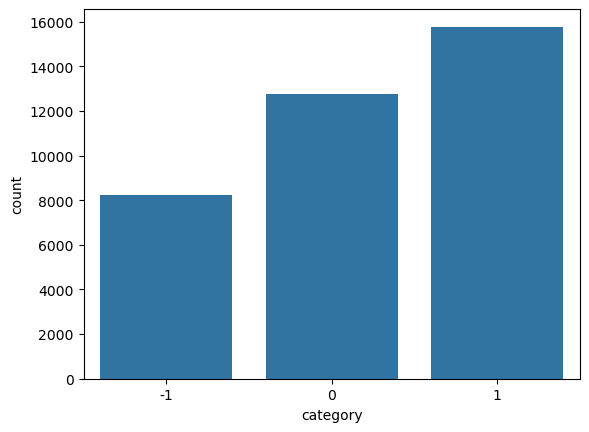

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

#disistributon of dat

sns.countplot(data=df,x='category')

In [184]:
# frequency distribution by percentage

df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [188]:
# make a new colum word_count to count number of words in each column

df['word_count'] = df['clean_comment'].apply(lambda x:len(x.split()))
df.sample(5)

,clean_comment,category,word_count
9141,modi india the rich get richer the poor get su...,-1,27
25658,mitron mujhe sirf hafta dijiye majority jugaad...,0,8
11794,donate the aclu donate the aclu donate the acl...,-1,95
11540,and when the free encyclopedia the team sports...,1,83
25867,agree with this qrnlrly2gnom3btbprzypk html,0,5


In [190]:
# we will analze this coloum to see if there is any implication of word count on sentiments
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

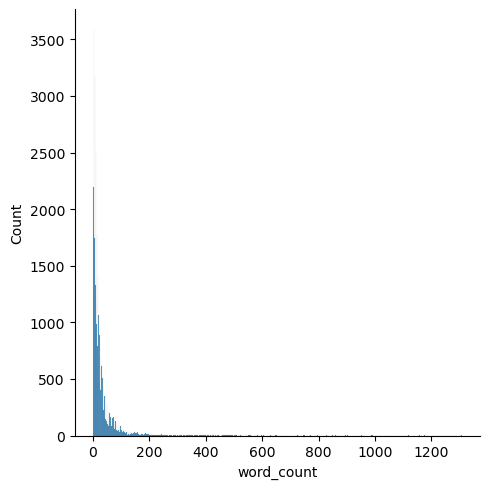

In [193]:
sns.displot(data=df,x='word_count')  

# this clearly shows it highly left skwed. lot of comments have very less nub,er of words and very few comments have high number of words . which shows
#there is outlier

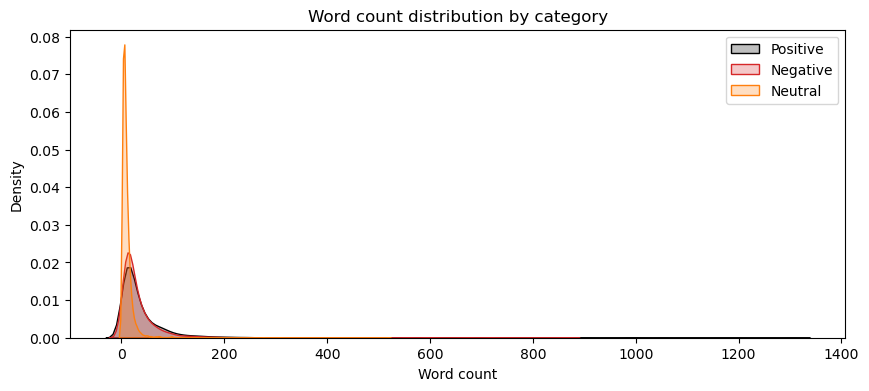

In [205]:
plt.figure(figsize=(10,4))
categories = {1: "Positive", -1: "Negative",0: "Neutral"}
colors = {1: "#000000", -1: "#d62728", 0: "#ff7f0e"}

for cat, label in categories.items():
    sns.kdeplot(
        data=df[df['category'] == cat],
        x="word_count",
        label=label,
        fill=True,
        color=colors[cat]
    )

#add title and labels
plt.title('Word count distribution by category')
plt.xlabel('Word count')
plt.ylabel('Density')

# add legend
plt.legend()

#show the plot
plt.show()

<Axes: ylabel='word_count'>

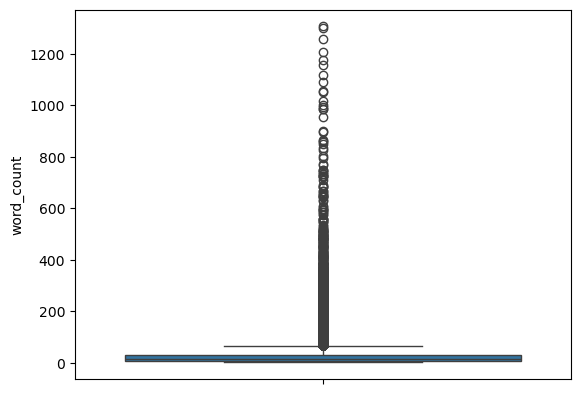

In [206]:
# outlier detection
sns.boxplot(df['word_count'])

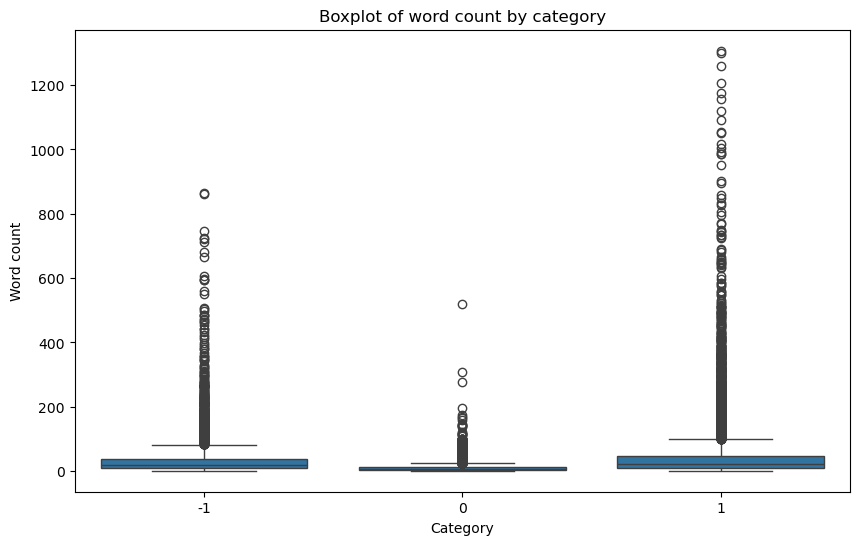

In [211]:
# category wise boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='category',y='word_count')
plt.title('Boxplot of word count by category')
plt.xlabel('Category')
plt.ylabel('Word count')
plt.show()



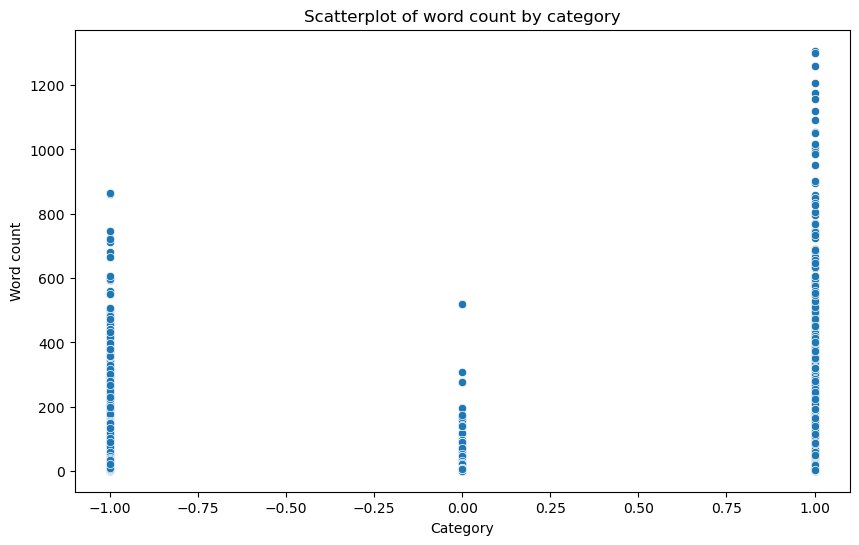

In [214]:
#scatter plot
# category wise boxplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='category',y='word_count')
plt.title('Scatterplot of word count by category')
plt.xlabel('Category')
plt.ylabel('Word count')
plt.show()

# there large variety in word count in positive and negative as compared to neutral

<Axes: xlabel='category', ylabel='word_count'>

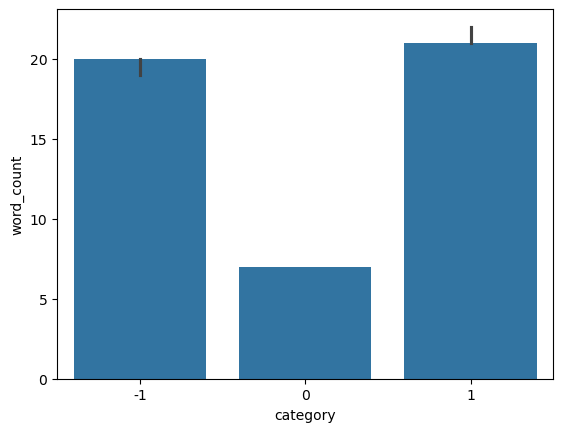

In [215]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

# stopword analysis

In [216]:
!pip install nltk

In [220]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#define the list of english stopwords
stop_words = set(stopwords.words('english'))

# create a new coloumn stop_words by counting number of stiowords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len ([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [224]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
33619,you forgot the blablabla announced number one ...,1,12,3
17823,lol even such situations karthik and gavaskar ...,1,14,4
27049,hope modiji erects similar statues every state...,0,10,1
9139,mid 2013 for few days had actually dabbled wit...,1,83,30
3095,why only shows bjp 121 not any others are they...,1,16,8


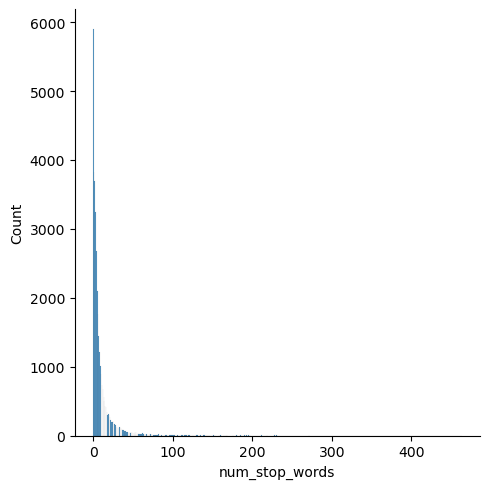

In [226]:
#distribution of stop_words
sns.displot(data=df,x='num_stop_words')  

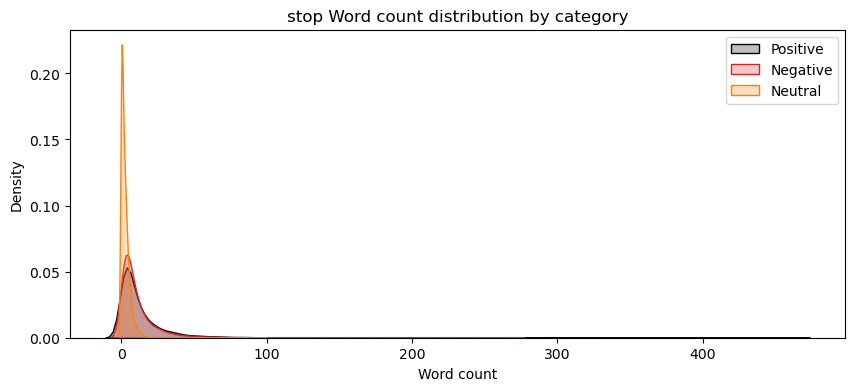

In [228]:
plt.figure(figsize=(10,4))
categories = {1: "Positive", -1: "Negative",0: "Neutral"}
colors = {1: "#000000", -1: "#d62728", 0: "#ff7f0e"}

for cat, label in categories.items():
    sns.kdeplot(
        data=df[df['category'] == cat],
        x="num_stop_words",
        label=label,
        fill=True,
        color=colors[cat]
    )

#add title and labels
plt.title('stop Word count distribution by category')
plt.xlabel('Word count')
plt.ylabel('Density')

# add legend
plt.legend()

#show the plot
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

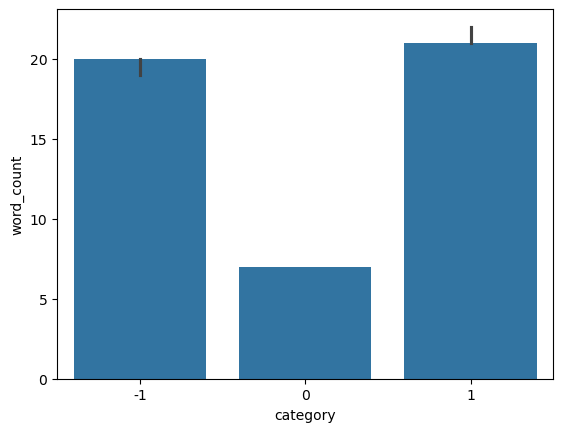

In [229]:
sns.barplot(df,x='category',y='word_count',estimator='median')

C:\Users\mukti\AppData\Local\Temp\ipykernel_11000\2281039536.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df,y='stop_word',x='count',palette='viridis')


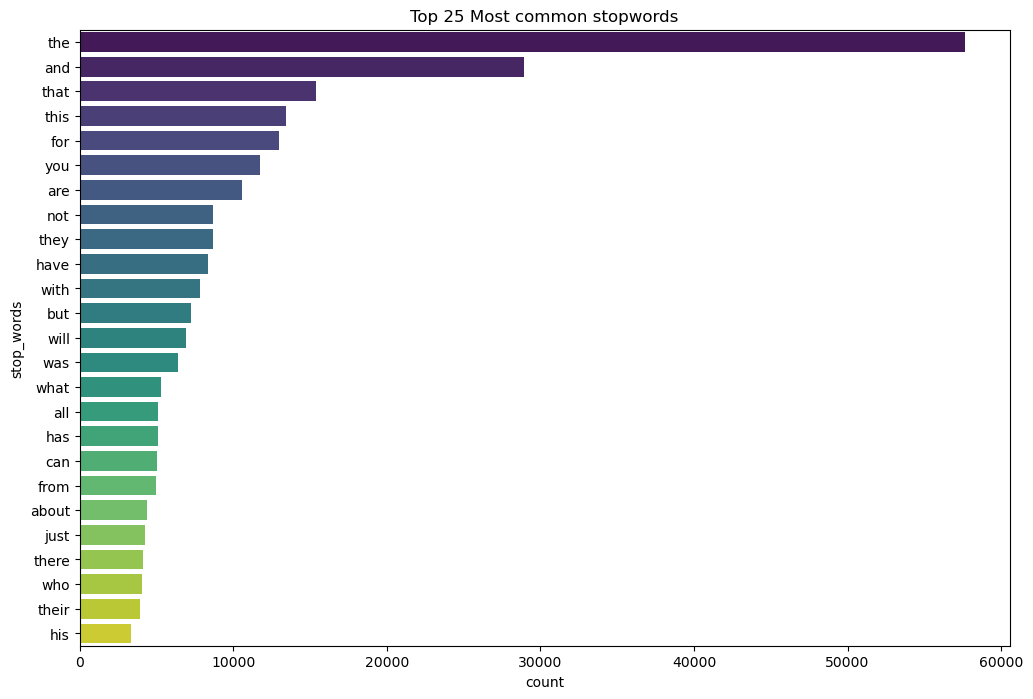

In [238]:
# create a frequency distribution of stop words in 'clean_comment coloumn'

from collections import Counter

# extract all stop words from the comments using the previously defined 'common_stopwords'

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

#count the number of most common stop words
most_common_stopwords = Counter(all_stop_words).most_common(25)

# convert them dataframe

top_25_df =pd.DataFrame(most_common_stopwords,columns=['stop_word','count'])

# create a barplot for the top 25 coloumns

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_df,y='stop_word',x='count',palette='viridis')
plt.title('Top 25 Most common stopwords')
plt.xlabel('count')
plt.ylabel('stop_words')
plt.show()

In [239]:
# in the above not and but words are used a lot which can have eefect on sentiment analysis and should be tackled

# total number of characters 

In [240]:
df['num_chars'] =df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [241]:
df['num_chars'].describe()

# similar distribution like  wordswhich we saw above

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [247]:
# lets find number of characters in each comments
from collections import Counter

#combine all the comments in one large string
all_text =' '.join(df['clean_comment'])

# count the frequenct

char_frequency = Counter(all_text)

#convert the charcter to dataframe

char_frequency_df = pd.DataFrame(char_frequency.items(),columns = ['character','frequency'])

In [248]:
char_frequency_df

,character,frequency
0,f,78866
1,a,481134
2,m,155561
3,i,401388
4,l,250104
...,...,...
1373,ണ,1
1374,р,1
1375,ч,1
1376,т,1


In [251]:
char_frequency_df['character'].values

array(['f', 'a', 'm', ..., 'ч', 'т', 'ю'], dtype=object)

In [255]:
char_frequency_df.tail(50)

,character,frequency
1328,妖,1
1329,婆,1
1330,段,1
1331,她,1
1332,谁,1
1333,抹,1
1334,掉,1
1335,坛,1
1336,回,1
1337,毫,1


# Punctuation

In [256]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
16551,awesome work but the lips are too plump too co...,1,17,8,85,0
5781,recall that law and order state subject the po...,1,140,44,878,0
27514,ghar aaja pardesi tera desh bulaaye,0,6,0,35,0
29098,multiple international media houses coming out...,1,95,29,591,0
8843,are trying become another pakistan saudi arabia,0,7,1,47,0


In [257]:
df['num_punctuation_chars'].describe()  ## there is no punctuation marks

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

# Bigram and Trigrams

C:\Users\mukti\AppData\Local\Temp\ipykernel_11000\1012993805.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


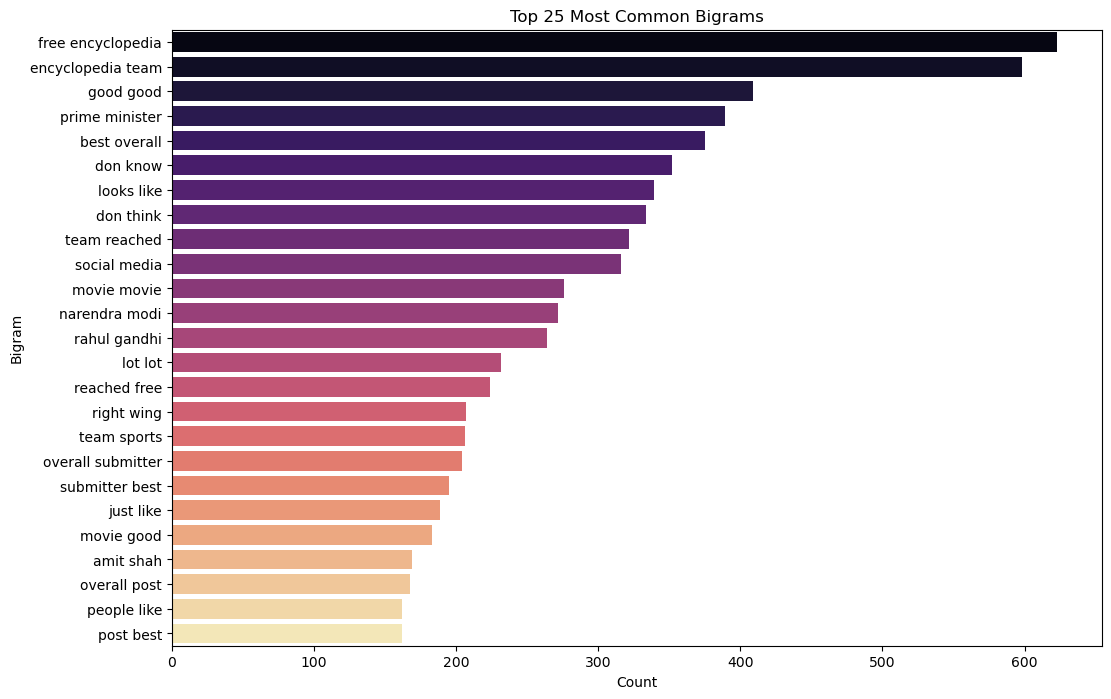

In [258]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\mukti\AppData\Local\Temp\ipykernel_11000\1683671783.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='coolwarm')


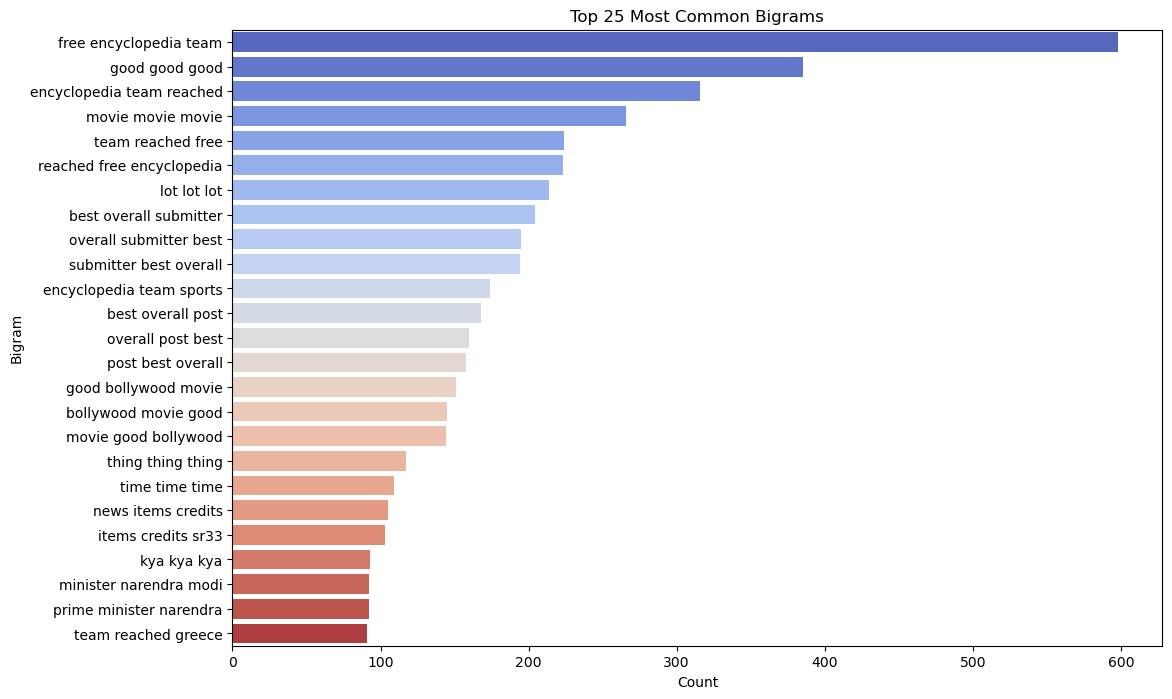

In [259]:
## trigram

from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='coolwarm')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

# Second level preprocessing of based on first level processing

In [260]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation

import re 

df['clean_comment'] = df['clean_comment'].str.replace(
    r'[^A-Za-z0-9\s!?.,]', 
    '', 
    regex=True
)

In [264]:
# check if its removed 
pattern = r'[^A-Za-z0-9\s!?.,]'
df['clean_comment'].str.contains(pattern, regex=True).sum()

0

In [266]:
# check whats is left

# lets find number of characters in each comments
from collections import Counter

#combine all the comments in one large string
all_text =' '.join(df['clean_comment'])

# count the frequenct

char_frequency = Counter(all_text)

#convert the charcter to dataframe

char_frequency_df = pd.DataFrame(char_frequency.items(),columns = ['character','frequency'])
char_frequency_df

,character,frequency
0,f,78866
1,a,481134
2,m,155561
3,i,401388
4,l,250104
5,y,115420
6,,1091592
7,o,379908
8,r,331425
9,n,388465


In [269]:
# stop word removal

from nltk.corpus import stopwords

#define stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) -{'not','but','however','no','yet'}

# Remove stop words from clean_comments coloumn ,rtaing essential onces

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [270]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [271]:
# check if stop word as removed 
df['clean_comment'].str.contains(
    r'\b(?:' + '|'.join(stop_words) + r')\b', regex=True
).sum()

0

In [272]:
 ## lemitization  --bring similar words in similar format

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mukti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [274]:
for sentence in df['clean_comment'].head(10):
    print(sentence)

family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach
buddhism much lot compatible christianity especially considering sin suffering almost thing suffering caused wanting thing want going getting thing wrong way christian would mean wanting thing coincide god wanting thing coincide but without aid jesus buddhism could also seen proof god mighty omnipotence certainly christian lucky one christ side but everyone else well many christian believe god grace salvation buddhism god way showing grace upon others would also help study thing jesus said see buddha made similar claim rich man getting heaven joke basically advocating rid material possession fact distinctly remembered jesus making someone cry someone asked achieve salvation jesus replied live like buddhist roughly translated also point buddha rarely spoke anything god theory personally knew w

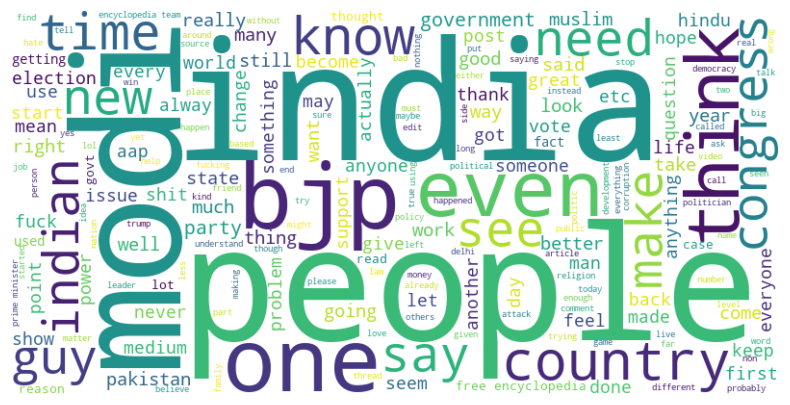

In [282]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Hide axes
    plt.show()

plot_word_cloud(df['clean_comment'])

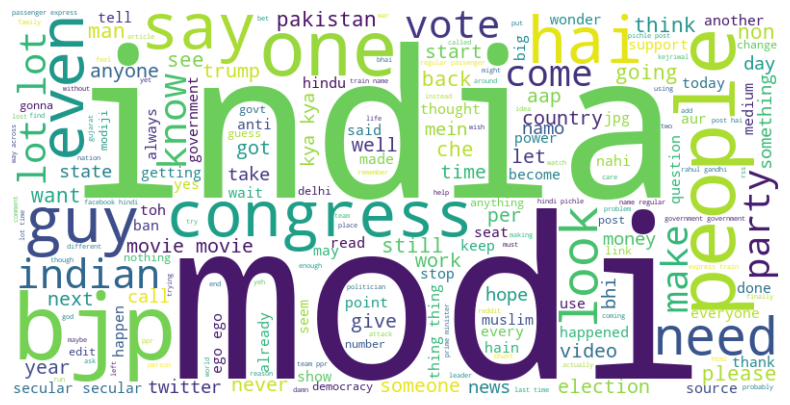

In [283]:
plot_word_cloud(df[df['category'] == 0]['clean_comment'])

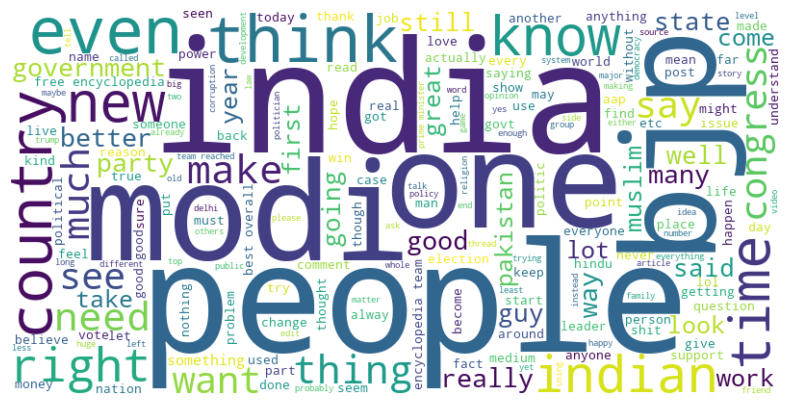

In [284]:
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

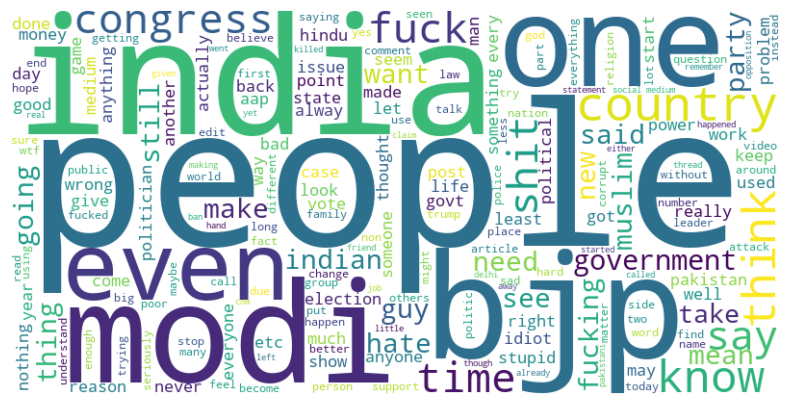

In [285]:
plot_word_cloud(df[df['category'] == -1]['clean_comment'])

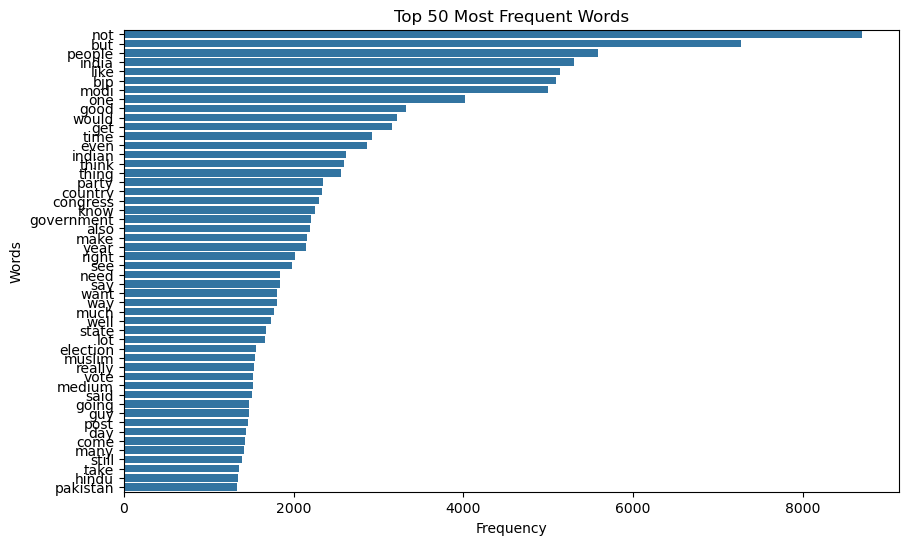

In [286]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

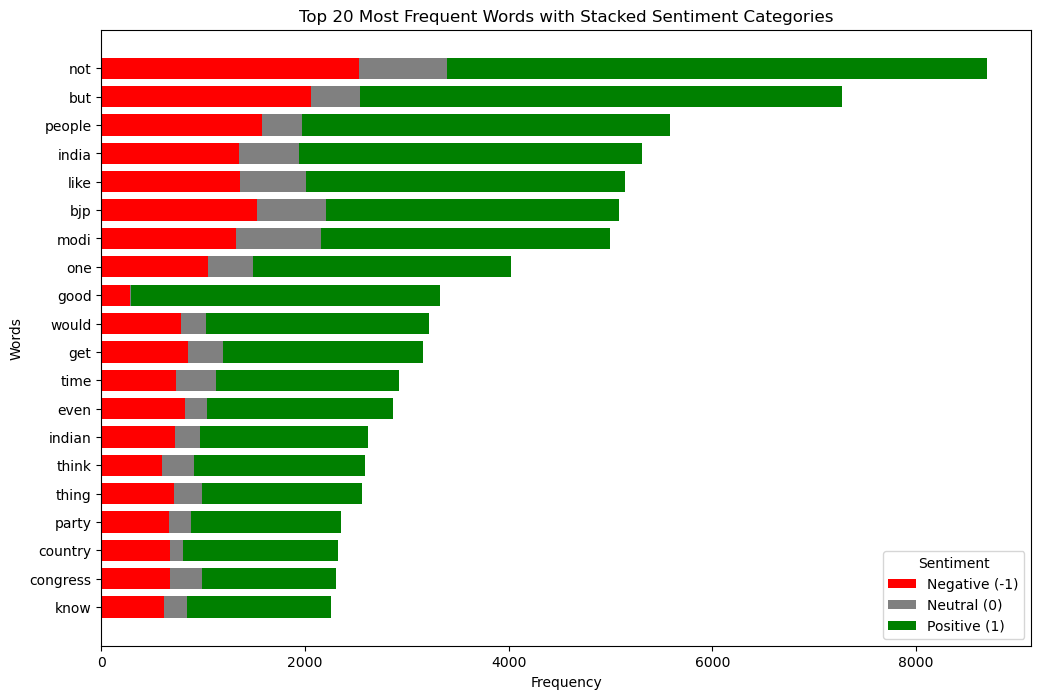

In [287]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)